# Learning Curves

In [14]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10**5, n_features=20, n_informative=5, n_redundant=5, n_classes=2)

In [15]:
from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

def learning_curve_plot(hypothesis, X,y, cv=10, confidence=0.95, scoring='accuracy', sizes = [ 0.1, 0.33, 0.55, 0.78, 1. ]):
    train_size, train_scores, test_scores = learning_curve(hypothesis, X, y, train_sizes= sizes, \
                                                           exploit_incremental_learning=False, \
                                                           cv=cv, scoring=scoring, n_jobs=-1)
    mean_train  = np.mean(train_scores,axis=1)
    upper_train = np.clip(mean_train + np.std(train_scores,axis=1)*st.norm.ppf(confidence),0,1)
    lower_train = np.clip(mean_train - np.std(train_scores,axis=1)*st.norm.ppf(confidence),0,1)
    mean_test   = np.mean(test_scores,axis=1)
    upper_test = np.clip(mean_test + np.std(test_scores,axis=1)*st.norm.ppf(confidence),0,1)
    lower_test = np.clip(mean_test - np.std(test_scores,axis=1)*st.norm.ppf(confidence),0,1)
    plt.plot(train_size,mean_train,'ro-', label='In-sample')
    plt.plot(train_size,mean_test,'bo-', label='Cross-validated')
    plt.fill_between(train_size, upper_train, lower_train, alpha=0.1, color='r')
    plt.fill_between(train_size, upper_test, lower_test, alpha=0.1, color='b')
    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel(scoring) 
    plt.legend(loc='lower right', numpoints= 1)
    plt.show()


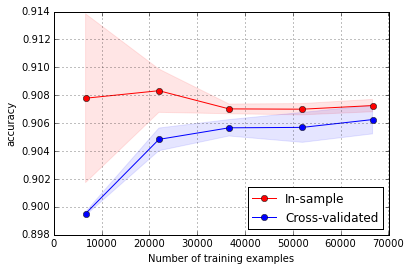

In [19]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

hypothesis =  make_pipeline(PolynomialFeatures(2), LogisticRegression()) 
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

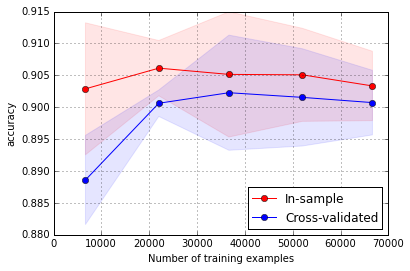

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=3)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

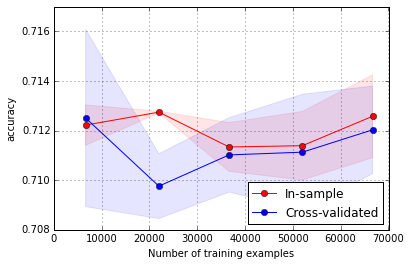

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression

hypothesis = LogisticRegression(C=0.5)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

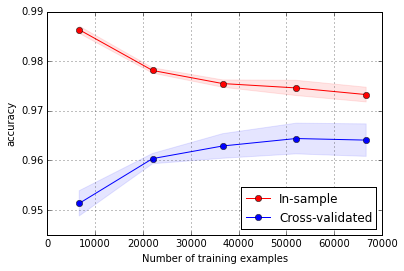

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(n_estimators=30, learning_rate=0.1, max_depth=8)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

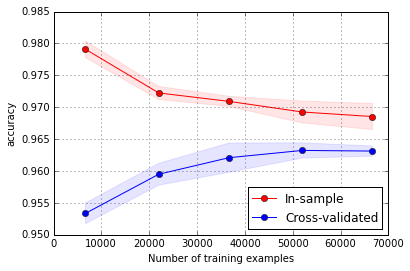

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
hypothesis = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=6)
learning_curve_plot(hypothesis, X,y, cv=3, scoring='accuracy')

# SVD Example

In [8]:
import requests, zipfile, io, os
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))

In [14]:
print (z.namelist())

['ml-latest-small/', 'ml-latest-small/links.csv', 'ml-latest-small/movies.csv', 'ml-latest-small/ratings.csv', 'ml-latest-small/README.txt', 'ml-latest-small/tags.csv']


In [15]:
z.extract('ml-latest-small/ratings.csv', path=os.getcwd())
z.extract('ml-latest-small/movies.csv', path=os.getcwd())
print (os.getcwd())

C:\scisoft\WinPython-64bit-3.4.3.5\notebooks\docs


In [29]:
import pandas as pd
movie_ratings = pd.read_csv(os.getcwd()+'//ml-latest-small//ratings.csv')
movie_titles = pd.read_csv(os.getcwd()+'//ml-latest-small//movies.csv')
movies = pd.merge(movie_ratings,movie_titles)
movie_matrix = movies.pivot_table(values='rating', index='userId', columns='title', fill_value=0)

In [31]:
movie_matrix.shape

(718, 8913)